El problema que abordaremos es predecir la temperatura máxima para
mañana en una determinada ciudad usando un año de datos meteorológicos
anteriores. Usted usará Seattle, WA, pero también puede buscar datos para
otra ciudad usando la herramienta de datos climáticos en línea de la NOAA.

Tenemos acceso a un año de temperaturas máximas históricas, las
temperaturas de los dos días anteriores y una estimación de un amigo que
siempre afirma saberlo todo sobre el clima. Este es un problema de
aprendizaje automático de regresión supervisado. Durante el entrenamiento,
para usar random forest debemos darle tanto las características como los
objetivos, y debe aprender a asignar los datos a una predicción.

Para esto usará los datos meteorológicos para Seattle, WA de 2016 utilizando
la herramienta de datos climáticos en línea de la NOAA. En general, alrededor
del 80 % del tiempo dedicado al análisis de datos se dedica a la limpieza y
recuperación de datos, pero esta carga de trabajo se puede reducir
encontrando fuentes de datos de alta calidad. La herramienta NOAA es sorprendentemente fácil de usar y los datos de temperatura se pueden
descargar como archivos csv limpios que se pueden analizar. El archivo de
trabajo se llama temps.csv que encontrará cargado en la plataforma.

Usted posee las siguientes variables para trabajar:
- year: 2016 para todos los puntos de datos
- month: número del mes del año
- day: número para el día del año
- week: día de la semana como cadena de caracteres
- temp_2: temperatura máxima 2 días antes
- temp_1: temperatura máxima 1 día antes
- average: temperatura máxima promedio histórica
- actual: medición de temperatura máxima
- friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio

Realice lo siguiente:
1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de
otro modo, realice un análisis descriptivo de sus datos, comente.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [43]:
#Importar
import pandas as pd
#Dividir en punto y coma ademas de considerar el punto como decimal. Y mostar. 
df = pd.read_csv("CD - M5 AE6 - temps.csv", sep=';', decimal='.')
display(df)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [20]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


Respecto a los datos obtenidos de años anteriores deacuerdo al clima, se puede destacar que hay un total de 348 datos tomados, para el año 2016 de enero a diciembre, y para la amyoria de los dias de la semana, con dos datos de temperatura que tiene un promedio de temp1 igual a 62, 7 y temp2 de 62, 65 sin embargo el promedio entre ambas es de 59,7; ademas es importante considerar que la desviacion para estos tres valores es alta. El valor actual es la es la tempreatura real medida maxima, la cual tiene un promedio de 62,5, ademas respecto al promedio pronosticado por el amigo es de 60,03.  

2. Realice un análisis gráfico de las temperaturas máximas históricas, las temperaturas de los dos días anteriores y la estimación del amigo, con respecto a la fecha. Comente si hay anomalías.

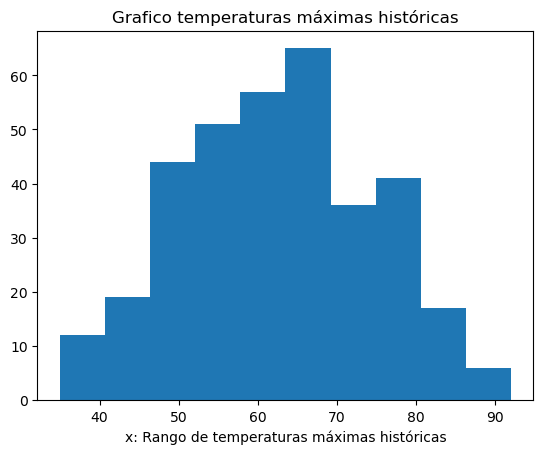

In [22]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df["actual"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico temperaturas máximas históricas')
plt.xlabel('x: Rango de temperaturas máximas históricas')
plt.show()

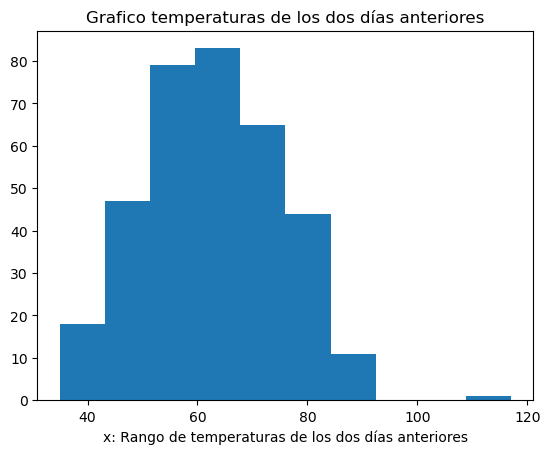

In [23]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df["temp_2"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico temperaturas de los dos días anteriores')
plt.xlabel('x: Rango de temperaturas de los dos días anteriores')
plt.show()

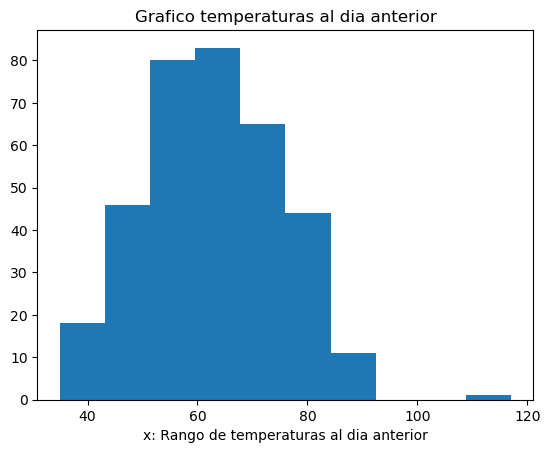

In [32]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df["temp_1"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico temperaturas al dia anterior')
plt.xlabel('x: Rango de temperaturas al dia anterior')
plt.show()

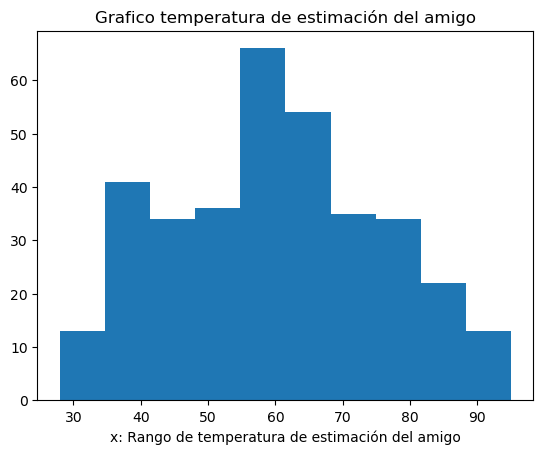

In [31]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df["friend"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico temperatura de estimación del amigo')
plt.xlabel('x: Rango de temperatura de estimación del amigo')
plt.show()

Respecto a las temperaturas maximas historicas que resulta ser el valor real de medicion, en comparacion con la temperatura de los dos dias anteriores y el dia anterior, se ve una diferencia, ya que el grafico de la tempreatura maxima hitorica, tiene los datos agrupados en el centro, mientras que el grafico de las temperatura de los dias anteriores se eucnetran sesgadas hacia la izquerda. Ahora respecto al grafico de la estimacion de amigo, la diferencia de los valores tambien son considerableas, aun cuando los dos graficos estan centrados en el centro. Finalmente se puede destacar que faltan algunas toma de muestra al inicio de algunos meses pero esto no son significativos para el análisis, ademas de que no existen valores anomalos. 

Preparación de la data:

3. Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.

In [47]:
recodifica = pd.get_dummies(df)
recodifica

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


4. Ahora, separe los datos en predictores y variable respuesta. Su variable Y es la temperatura máxima real y los predictores son todas las columnas que usa el modelo para hacer una predicción. Asegúrese de transformar en una matriz Numpy porque esa es la forma en que funciona el algoritmo.

In [62]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [51]:
X = recodifica[['temp_2', 'temp_1', 'average', 'friend', 'week_Fri', 'week_Mon','week_Sat','week_Sun','week_Thurs','week_Sat','week_Tues','week_Wed']].values
X

array([[45. , 45. , 45.6, ...,  0. ,  0. ,  0. ],
       [44. , 45. , 45.7, ...,  1. ,  0. ,  0. ],
       [45. , 44. , 45.8, ...,  0. ,  0. ,  0. ],
       ...,
       [47. , 48. , 45.3, ...,  0. ,  0. ,  0. ],
       [48. , 48. , 45.4, ...,  0. ,  0. ,  0. ],
       [48. , 57. , 45.5, ...,  1. ,  0. ,  0. ]])

In [53]:
y = recodifica['actual'].values
y

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla (random_state = 42) para obtener los mismos valores.

In [78]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.25, random_state=42)
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (261, 12) &  Size of Y training set (261,)


6. Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días.

In [72]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
predTree = drugTree.predict(X_testset)
print (predTree)
print (y_testset)
print("\n Exactitud: ", metrics.accuracy_score(y_testset, predTree))

[65 68 49 68 67 60 79 79 68 75 68 75 40 68 67 52 58 52 52 75 60 55 67 68
 52 49 65 40 68 72 60 68 55 79 72 68 55 49 67 42 60 54 60 45 68 60 49 79
 49 40 42 40 68 68 75 68 55 68 49 68 67 49 68 67 68 52 75 67 72 40 75 52
 68 49 52 68 45 72 42 54 52 60 75 75 68 68 42]
[66 61 52 66 70 82 85 84 65 92 61 85 44 65 69 62 64 56 53 79 63 57 67 62
 59 56 65 52 66 76 64 61 48 81 77 57 58 47 68 51 77 56 73 51 59 87 58 81
 58 42 49 40 65 64 70 65 53 57 53 60 67 49 53 69 55 68 76 69 78 36 74 57
 69 50 56 67 48 80 48 49 57 77 81 67 66 57 45]

 Exactitud:  0.05747126436781609


In [75]:
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
print("MSE:", mean_squared_error(y_testset,drugTree.predict(X_testset)))
print("MAE:", median_absolute_error(y_testset,drugTree.predict(X_testset)))
print("R2:", r2_score(y_testset,drugTree.predict(X_testset)))

MSE: 59.32183908045977
MAE: 4.0
R2: 0.5734354158987356


Ajuste del modelo:
    
7. Ajuste un modelo de regresión de bosque aleatorio con los datos de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_trainset, y_trainset)
rf

RandomForestRegressor(n_estimators=1000, random_state=42)

8. Obtenga la predicción. Coméntalo.

In [101]:
predictions = rf.predict(X_testset)
predictions

array([68.089, 60.781, 50.712, 61.348, 66.288, 72.623, 81.016, 77.955,
       62.73 , 72.702, 65.016, 73.104, 38.981, 62.71 , 70.882, 55.829,
       60.544, 57.257, 56.669, 74.764, 64.606, 54.509, 65.991, 62.922,
       58.918, 52.399, 67.789, 46.711, 61.472, 78.199, 72.99 , 63.127,
       55.26 , 79.803, 73.953, 61.67 , 53.284, 51.478, 67.94 , 44.383,
       71.207, 57.063, 74.863, 41.896, 61.402, 74.527, 53.606, 79.261,
       54.901, 43.187, 47.052, 42.078, 64.781, 66.05 , 75.329, 61.189,
       55.763, 59.214, 54.254, 58.913, 66.7  , 51.801, 60.522, 70.289,
       61.075, 58.552, 72.128, 69.277, 75.529, 41.48 , 76.824, 56.445,
       60.34 , 48.976, 54.343, 62.963, 43.348, 76.296, 47.82 , 51.793,
       53.008, 70.681, 74.615, 73.195, 62.981, 58.13 , 47.008])

9. Obtenga las métricas de precisión.

In [94]:
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
print("MSE:", mean_squared_error(y_testset,rf.predict(X_testset)))
print("MAE:", median_absolute_error(y_testset,rf.predict(X_testset)))
print("R2:", r2_score(y_testset,rf.predict(X_testset)))

MSE: 24.15247028735632
MAE: 3.0189999999999984
R2: 0.826327224461625


In [104]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(predictions - y_testset)
mape = 100 * (errors / y_testset)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Metrica de presicion/Accuracy:', round(accuracy, 2), '%.')

Metrica de presicion/Accuracy: 94.01 %.


10. ¿Considera que el modelo es adecuado?

Debido a que la presicion es del 94%, se puede considerar que el modelo es adecuado. 